Customer Segmentation 

Setup & Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv') 
print(df.head())

print(df.info())  
print(df.isnull().sum())  
print(df.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                  

Data Exploration & Preprocessing

Visualize the Data (Income vs Spending Score)

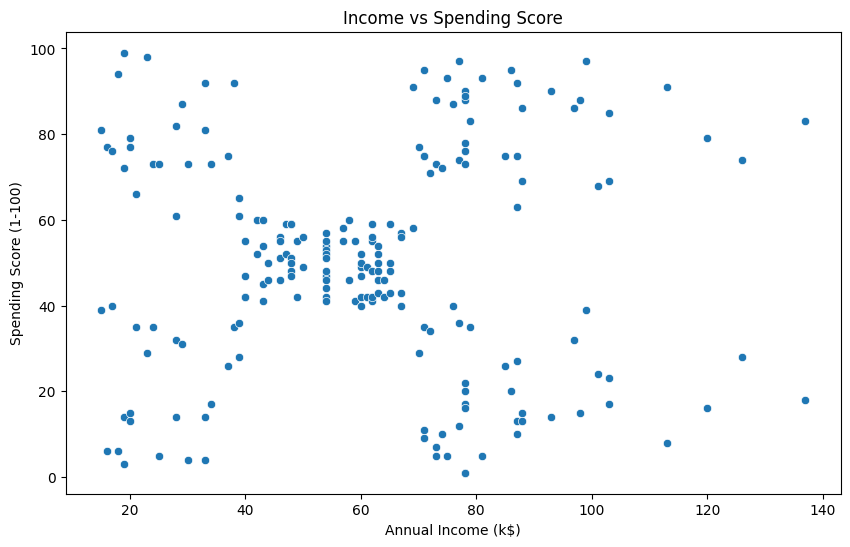

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

Feature Scaling (Important for K-Means & DBSCAN)

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Finding Optimal Number of Clusters (K-Means)

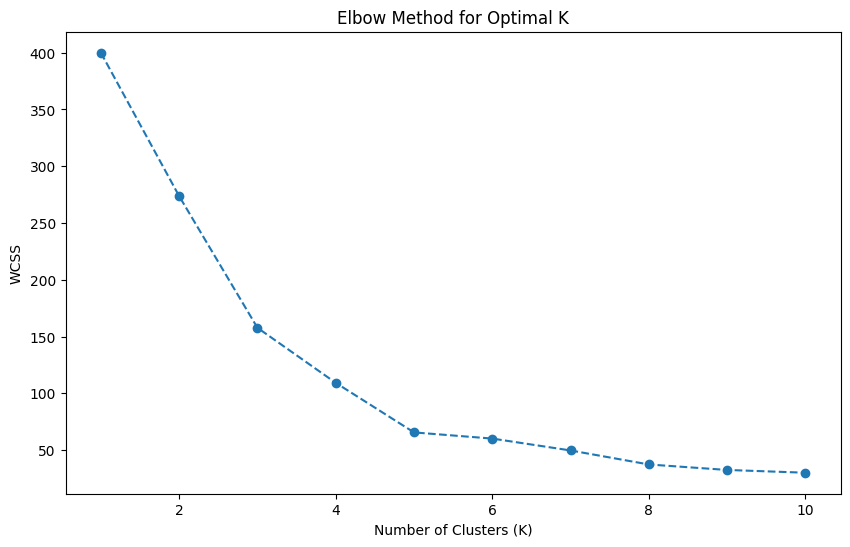

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

Applying K-Means Clustering

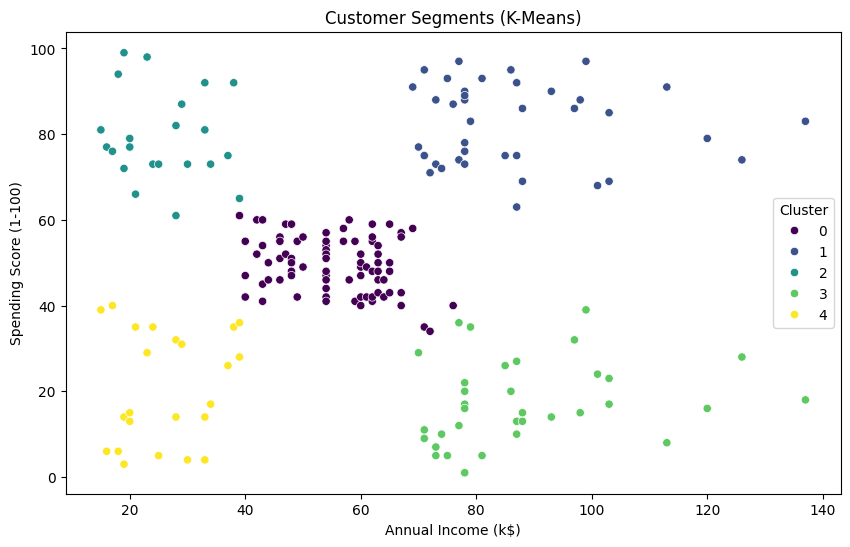

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', data=df)
plt.title('Customer Segments (K-Means)')
plt.show()

Analyzing Clusters (Bonus)

Average Spending per Cluster

In [14]:
cluster_stats = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

print(cluster_stats)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


Trying DBSCAN (Bonus)

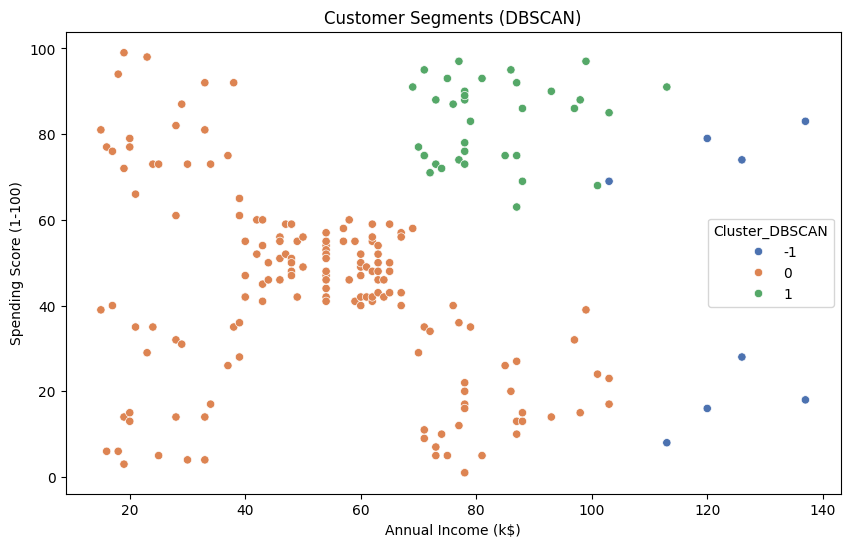

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

df['Cluster_DBSCAN'] = clusters_dbscan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_DBSCAN', palette='deep', data=df)
plt.title('Customer Segments (DBSCAN)')
plt.show()